# Correlation Analysis

**A method used to study the strength of the relationship between variables.**

**Useful to tell if there is any possible connection between the variables.**

**Correlation does not determine cause and effect since there are other factors influencing the result.**

**It does not tell us any information behind the relationship but it just says the relationship exists.**

**Correlation values lie between -1 and 1.**

**The closer the magnitude is to 1 or -1 the stronger the correlation.**

**Types of Correlation:**

**Positive correlation:**
-  **If one variable increases simultaneously with the other**
-  **Correlation coefficient is close to 1**

**Negative correlation**
-  **If one variable increases the other decreases**
-  **Correlation coefficient is close to -1**

In [38]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

# get the path of the file of lecture1.ipynb
#notebook_path = os.path.dirname("top10genes.ipynb")
location_of_data = "/Users/rahuldwivedi/Downloads/ovariandata/"
rna_file_name = "ovadata_RNA_Seq_v2_expression_median.txt"
clinical_file_name = "data_clinical_patient.txt"

In [39]:
def read_rna_file(location, name_file):

    import pandas as pd
    
    rna_file_path = location + name_file
    try:
        rna = pd.read_csv(rna_file_path,  sep='\t')
        
        #to make sure we do not process the name of genes we will convert them to string
        rna[['Hugo_Symbol', 'Entrez_Gene_Id']] = rna[['Hugo_Symbol', 'Entrez_Gene_Id']].astype(str)
        
        # make first two columns as indexx of data frame 
        rna =  rna.set_index([ 'Hugo_Symbol','Entrez_Gene_Id']) 
        
    except:
        print("***************")
        print("the location of file is not correct, or two columns 'Hugo_Symbol', 'Entrez_Gene_Id' do not exist")
        print("***************")
    
    return rna

In [40]:
rna = read_rna_file(location_of_data, rna_file_name)
rna.head()

TCGA-04-1348-01  TCGA-04-1357-01  TCGA-04-1362-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100133144             22.028266        17.671802        21.976720   
            100134869             25.716221        20.473921        29.909980   
            10357                321.241331       128.865135       424.021806   
            10431               1952.678661       901.425735      1366.864827   
            155060               222.150613       244.412320       377.449014   

                            TCGA-04-1364-01  TCGA-04-1365-01  TCGA-04-1514-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100133144             14.940150        10.382058         2.733694   
            100134869              7.827355         4.877826         6.227180   
            10357                400.227877       891.927121       380.425710   
            10431               1775.819439      1886.589299      1371.327702   
            155060               339.460985       128.196713       396.171828   

                            TCGA-04-1519-01  TCGA-09-0364-01  TCGA-09-0366-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100133144             19.315232        20.896304         5.421443   
            100134869             15.088948        27.821347        10.171431   
            10357                507.815414       856.606003       371.023437   
            10431               1525.885484       721.340307      1070.351388   
            155060                89.765797       586.616738       314.560329   

                            TCGA-09-0367-01       ...         TCGA-61-2102-01  \
Hugo_Symbol Entrez_Gene_Id                        ...                           
nan         100133144              1.190590       ...                4.923308   
            100134869             24.953771       ...                2.486953   
            10357                218.291376       ...              335.265779   
            10431               1392.102710       ...             1596.217812   
            155060               111.235044       ...              264.341700   

                            TCGA-61-2104-01  TCGA-61-2109-01  TCGA-61-2110-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100133144             20.466544        41.372838        20.519959   
            100134869             29.214073        43.867435        48.929509   
            10357                131.919622       305.443765        68.665161   
            10431               1128.424392      1026.626852      1172.472325   
            155060               687.011933       528.956140       570.717733   

                            TCGA-61-2111-01  TCGA-61-2113-01  TCGA-OY-A56P-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100133144              7.149914        21.566391        32.307387   
            100134869              6.756215         8.630438        26.618719   
            10357                225.455747        92.597754       203.931820   
            10431               1142.036809      1291.281828       588.503145   
            155060               228.074966       439.904885       510.841037   

                            TCGA-OY-A56Q-01  TCGA-VG-A8LO-01  TCGA-WR-A838-01  
Hugo_Symbol Entrez_Gene_Id                                                     
nan         100133144             26.118873        34.475700       126.819903  
            100134869             15.716029        28.912917        59.400754  
            10357                400.614342       309.174887       431.623999  
            10431               1304.656225      1345.236051      1460.986221  
            155060               387.776781       412.614342       540.597847  

[5 rows x 300 columns]

# Normalize the Data

In [41]:
def normalizing_patients(df_rna_values):

    #finding maximum level expression of genes for each patient
    Max_each_patient = df_rna_values.max(axis=0)
    
    #Divide the values of each gene by the maximum value of gene expression of the same patient patient
    df_normalized_rna_values = df_rna_values.divide(Max_each_patient, axis=1)
    
    return df_normalized_rna_values

In [42]:
normalized_rna = normalizing_patients(rna)
normalized_rna.head()

TCGA-04-1348-01  TCGA-04-1357-01  TCGA-04-1362-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100133144              0.000077         0.000076         0.000088   
            100134869              0.000090         0.000088         0.000120   
            10357                  0.001129         0.000555         0.001707   
            10431                  0.006860         0.003885         0.005503   
            155060                 0.000780         0.001053         0.001520   

                            TCGA-04-1364-01  TCGA-04-1365-01  TCGA-04-1514-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100133144              0.000022         0.000045         0.000020   
            100134869              0.000012         0.000021         0.000046   
            10357                  0.000597         0.003893         0.002791   
            10431                  0.002647         0.008234         0.010059   
            155060                 0.000506         0.000560         0.002906   

                            TCGA-04-1519-01  TCGA-09-0364-01  TCGA-09-0366-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100133144              0.000095         0.000078         0.000041   
            100134869              0.000074         0.000104         0.000077   
            10357                  0.002501         0.003210         0.002793   
            10431                  0.007516         0.002703         0.008058   
            155060                 0.000442         0.002198         0.002368   

                            TCGA-09-0367-01       ...         TCGA-61-2102-01  \
Hugo_Symbol Entrez_Gene_Id                        ...                           
nan         100133144              0.000004       ...                0.000011   
            100134869              0.000083       ...                0.000006   
            10357                  0.000726       ...                0.000778   
            10431                  0.004633       ...                0.003702   
            155060                 0.000370       ...                0.000613   

                            TCGA-61-2104-01  TCGA-61-2109-01  TCGA-61-2110-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100133144              0.000103         0.000259         0.000099   
            100134869              0.000147         0.000274         0.000237   
            10357                  0.000665         0.001911         0.000333   
            10431                  0.005687         0.006421         0.005679   
            155060                 0.003463         0.003309         0.002764   

                            TCGA-61-2111-01  TCGA-61-2113-01  TCGA-OY-A56P-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100133144              0.000045         0.000088         0.000109   
            100134869              0.000042         0.000035         0.000090   
            10357                  0.001412         0.000376         0.000691   
            10431                  0.007152         0.005241         0.001993   
            155060                 0.001428         0.001786         0.001730   

                            TCGA-OY-A56Q-01  TCGA-VG-A8LO-01  TCGA-WR-A838-01  
Hugo_Symbol Entrez_Gene_Id                                                     
nan         100133144              0.000098         0.000254         0.000571  
            100134869              0.000059         0.000213         0.000267  
            10357                  0.001506         0.002274         0.001943  
            10431                  0.004906         0.009895         0.006577  
            155060                 0.001458         0.003035         0.002434  

[5 rows x 300 columns]

# Finding top 10 genes with the highest variance

In [43]:
def var_rna_data(df_rna):
    
    df_rna['Variance'] = df_rna.var(axis=1)
    
    df_rna_var = df_rna.sort_values(by ='Variance', ascending=0)
    
    top_10_var_rna = df_rna_var.head(10)

    return top_10_var_rna.drop(["Variance"],axis=1)

In [44]:
top_10_var_rna = var_rna_data(normalized_rna)
top_10_var_rna

TCGA-04-1348-01  TCGA-04-1357-01  TCGA-04-1362-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
IGF2        3481                   0.009529         0.040637         0.493489   
COL1A1      1277                   0.069028         0.144819         0.050296   
EEF1A1      1915                   0.183659         0.658017         0.571312   
CLU         1191                   0.028697         0.501043         0.086541   
H19         283120                 0.197605         0.004170         0.000640   
GAPDH       2597                   0.449789         0.359466         0.301870   
CD74        972                    1.000000         1.000000         0.125584   
C3          718                    0.131190         0.126835         0.068805   
RPL8        6132                   0.145715         0.359117         0.368181   
RPS18       6222                   0.165588         0.336082         0.304159   

                            TCGA-04-1364-01  TCGA-04-1365-01  TCGA-04-1514-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
IGF2        3481                   1.000000         0.019999         0.263283   
COL1A1      1277                   0.011310         0.052526         0.370213   
EEF1A1      1915                   0.164350         0.334952         1.000000   
CLU         1191                   0.012596         0.105748         0.051734   
H19         283120                 0.009681         1.000000         0.001265   
GAPDH       2597                   0.050258         0.483308         0.540462   
CD74        972                    0.004711         0.421103         0.030924   
C3          718                    0.012590         0.073854         0.014514   
RPL8        6132                   0.149953         0.298796         0.126203   
RPS18       6222                   0.119808         0.221242         0.181827   

                            TCGA-04-1519-01  TCGA-09-0364-01  TCGA-09-0366-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
IGF2        3481                   0.181425         0.101218         0.207896   
COL1A1      1277                   0.050363         0.078105         0.046857   
EEF1A1      1915                   0.394201         0.505330         0.987982   
CLU         1191                   1.000000         0.005457         0.061353   
H19         283120                 0.003945         0.318906         0.290535   
GAPDH       2597                   0.436799         1.000000         1.000000   
CD74        972                    0.196997         0.004409         0.917782   
C3          718                    0.040983         0.000710         0.373340   
RPL8        6132                   0.384766         0.236084         0.196817   
RPS18       6222                   0.202832         0.367630         0.482862   

                            TCGA-09-0367-01       ...         TCGA-61-2102-01  \
Hugo_Symbol Entrez_Gene_Id                        ...                           
IGF2        3481                   0.147513       ...                1.000000   
COL1A1      1277                   0.011012       ...                0.173149   
EEF1A1      1915                   0.757957       ...                0.165689   
CLU         1191                   0.794264       ...                0.002477   
H19         283120                 0.138049       ...                0.001057   
GAPDH       2597                   1.000000       ...                0.080884   
CD74        972                    0.493734       ...                0.018807   
C3          718                    0.267672       ...                0.005367   
RPL8        6132                   0.859646       ...                0.047987   
RPS18       6222                   0.976327       ...                0.054899   

                            TCGA-61-2104-01  TCGA-61-2109-01  TCGA-61-2110-01  \
Hugo_Symbol Entrez_Gene_Id                             

In [45]:
top_10_var_rna = top_10_var_rna.reset_index(level='Entrez_Gene_Id', drop=True)
rna_top10 = top_10_var_rna.T
patient_id_rna = rna_top10.index

In [46]:
sns.pairplot(rna_top10 , diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height = 20)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


### The density function along the diagonal shows us the distribution of each variable (gene) and the scatterplots show the relationship between two genes at a time.

## Correlation Coeffiecient matrix between genes

In [47]:
rna_top10.corr()

Hugo_Symbol      IGF2    COL1A1    EEF1A1       CLU       H19     GAPDH  \
Hugo_Symbol                                                               
IGF2         1.000000 -0.013975 -0.275525 -0.196435  0.170911 -0.239422   
COL1A1      -0.013975  1.000000 -0.230711 -0.133889  0.049919 -0.100939   
EEF1A1      -0.275525 -0.230711  1.000000  0.057506 -0.079290  0.375774   
CLU         -0.196435 -0.133889  0.057506  1.000000 -0.024537  0.153857   
H19          0.170911  0.049919 -0.079290 -0.024537  1.000000 -0.053195   
GAPDH       -0.239422 -0.100939  0.375774  0.153857 -0.053195  1.000000   
CD74        -0.370404  0.007574  0.094790  0.215514 -0.017531  0.151252   
C3          -0.217477  0.127953  0.061906  0.300181 -0.054431  0.124619   
RPL8        -0.191876 -0.065253  0.371147  0.244573 -0.058463  0.342592   
RPS18       -0.190918 -0.224195  0.496218  0.151978 -0.070231  0.353359   

Hugo_Symbol      CD74        C3      RPL8     RPS18  
Hugo_Symbol                                          
IGF2        -0.370404 -0.217477 -0.191876 -0.190918  
COL1A1       0.007574  0.127953 -0.065253 -0.224195  
EEF1A1       0.094790  0.061906  0.371147  0.496218  
CLU          0.215514  0.300181  0.244573  0.151978  
H19         -0.017531 -0.054431 -0.058463 -0.070231  
GAPDH        0.151252  0.124619  0.342592  0.353359  
CD74         1.000000  0.305852  0.260661  0.023556  
C3           0.305852  1.000000  0.163591  0.118430  
RPL8         0.260661  0.163591  1.000000  0.511579  
RPS18        0.023556  0.118430  0.511579  1.000000

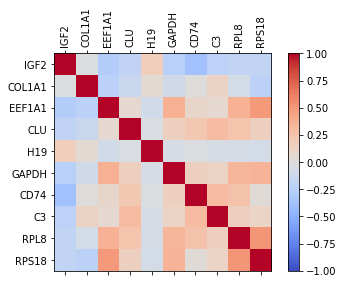

In [48]:
corr =rna_top10.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(rna_top10.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(rna_top10.columns)
ax.set_yticklabels(rna_top10.columns)
plt.show()

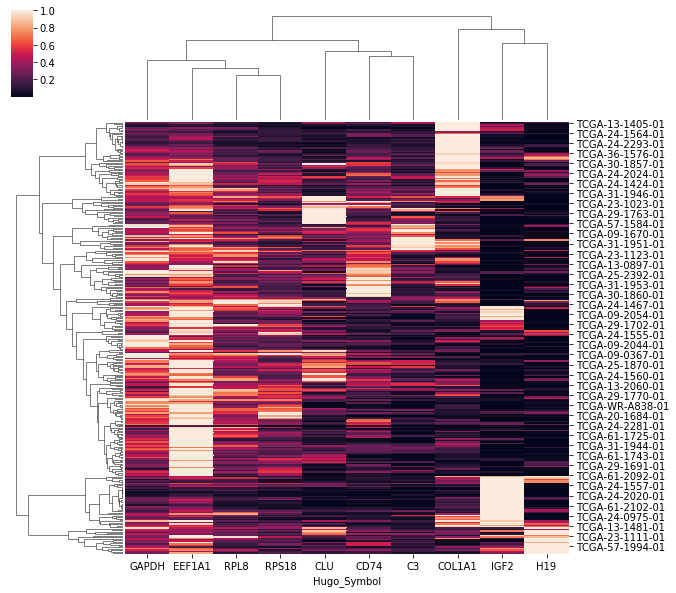

In [49]:
sns.clustermap(rna_top10, metric="correlation")

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


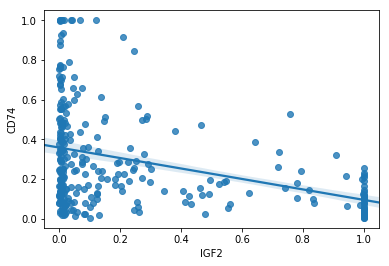

In [50]:
sns.regplot(x="IGF2", y="CD74", data=rna_top10);

In [51]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(rna_top10["IGF2"],rna_top10["CD74"])
print(slope, intercept, r_value, p_value, std_err)

-0.2636317413776578 0.35788851344774847 -0.3704039050378575 3.4498535040552676e-11 0.0382974022382571


### p-value = 0 < 0.05 which indicates that the correlation is significant

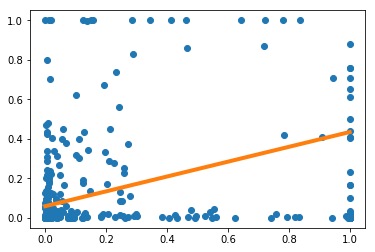

In [62]:
plt.plot(rna_top10["IGF2"],rna_top10["H19"],marker='o',linestyle='')
plt.show
plt.plot([slope*x+intercept for x in range(2)], linewidth=4)

In [53]:
slope, intercept, r_value, p_value, std_err = stats.linregress(rna_top10["IGF2"],rna_top10["EEF1A1"])
print(slope, intercept, r_value, p_value, std_err)

-0.22321625192901962 0.7252395891758346 -0.27552547766246877 1.2569192304324341e-06 0.04511407352320626


### p-value = 0.012 < 0.05 which indicates that the correlation is significant

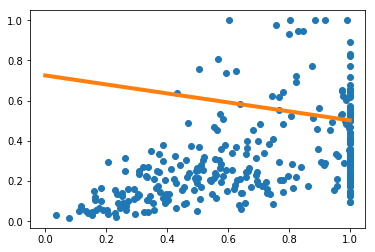

In [54]:
plt.plot(rna_top10["EEF1A1"],rna_top10["RPS18"],marker='o',linestyle='')
plt.show
plt.plot([slope*x+intercept for x in range(2)], linewidth=4)

In [55]:
slope, intercept, r_value, p_value, std_err = stats.linregress(rna_top10["EEF1A1"],rna_top10["RPS18"])
print(slope, intercept, r_value, p_value, std_err)

0.374968869532367 0.05959104463360898 0.49621772890377647 4.7085207467953066e-20 0.038004379212412905


### p-value = 0.88 > 0.05 which indicates that the correlation is not significant

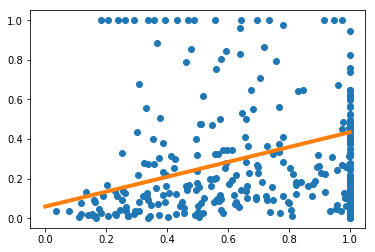

In [57]:
plt.plot(rna_top10["EEF1A1"],rna_top10["CLU"],marker='o',linestyle='')
plt.show
plt.plot([slope*x+intercept for x in range(2)], linewidth=4)

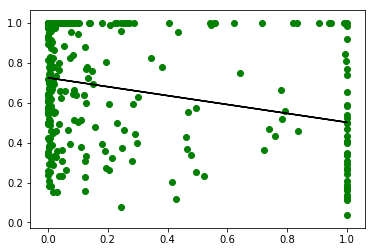

In [59]:
from sklearn.linear_model import LinearRegression

#convert X into a column vector
X = rna_top10["IGF2"].values[:,np.newaxis]
Y = rna_top10["EEF1A1"].values


model = LinearRegression()
model.fit(X, Y)

plt.scatter(X, Y,color='g')
plt.plot(X, model.predict(X),color='k')

plt.show()

In [60]:
from sklearn import datasets, linear_model
import statsmodels.api as sm

x = sm.add_constant(rna_top10["EEF1A1"])
least_square = sm.OLS(rna_top10["RPS18"], x)
ls = least_square.fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  RPS18   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     97.35
Date:                Fri, 08 Mar 2019   Prob (F-statistic):           4.71e-20
Time:                        17:00:30   Log-Likelihood:                 74.483
No. Observations:                 300   AIC:                            -145.0
Df Residuals:                     298   BIC:                            -137.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0596      0.028      2.147      0.0

In [64]:
from sklearn import datasets, linear_model
import statsmodels.api as sm

#need to add column of 1's to correspond to the intercept 
x = sm.add_constant(rna_top10["EEF1A1"])
least_square = sm.OLS(rna_top10["CLU"], x)
ls = least_square.fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                    CLU   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9887
Date:                Fri, 08 Mar 2019   Prob (F-statistic):              0.321
Time:                        17:02:09   Log-Likelihood:                -45.392
No. Observations:                 300   AIC:                             94.78
Df Residuals:                     298   BIC:                             102.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2471      0.041      5.970      0.0